<a href="https://colab.research.google.com/github/gfrts/spotify_dsproject/blob/main/spotify_dsproject_cleaning%26eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import log_loss, make_scorer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS - Awari/spotify_project/full_dataset.csv')

In [ ]:
df.head()

,id,name,artist,genre,acousticness,danceability,valence,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,5ydeCNaWDmFbu4zl0roPAH,Groovejet (If This Ain't Love) [feat. Sophie E...,Spiller,house,0.000132,0.719,0.626,227619,0.806,0.0889,9,0.3610,-6.802,0,0.0389,123.037,4
1,1kb5MBYPIwuOucLUzYqnxi,All I Want (feat. Jake Shears) - Purple Disco ...,Jake Shears,house,0.005450,0.681,0.841,210268,0.759,0.7000,8,0.0458,-7.133,0,0.0296,121.008,4
2,1gOJTtLoFhsSTX7OEiKzuI,Get It Right (feat. Shawnee Taylor) - Club Mix...,Harry Romero,house,0.001300,0.799,0.576,147440,0.903,0.0491,6,0.1540,-6.135,1,0.0674,124.004,4
3,7IQYnbKrjET0nZbWxbpLpx,You Are The One,Ferreck Dawn,house,0.040400,0.845,0.636,155122,0.710,0.0191,0,0.1140,-7.704,0,0.0495,125.015,4
4,2cYoxKPVUDFhFx7J1vjRl9,Feeling U (feat. Yasmin),Sonny Fodera,house,0.213000,0.822,0.788,291064,0.548,0.0625,0,0.2230,-6.537,1,0.0409,122.010,4


In [ ]:
df.shape

(5482, 17)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(5215, 17)

In [ ]:
df.dtypes

id                   object
name                 object
artist               object
genre                object
acousticness        float64
danceability        float64
valence             float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

In [ ]:
df.groupby(['genre']).mean()

,acousticness,danceability,valence,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
genre,,,,,,,,,,,,,
house,0.023065,0.764510,0.583870,362462.767906,0.793335,0.454867,5.825929,0.148694,-7.628631,0.502267,0.072352,124.119500,3.996374
minimal_deeptech,0.018220,0.802225,0.550884,398939.965944,0.797355,0.844374,6.152735,0.106681,-9.591659,0.501548,0.080347,126.628988,3.989680
proghouse_melodic,0.056694,0.714415,0.228151,407587.857284,0.719493,0.792594,5.599604,0.133820,-9.853725,0.544103,0.052019,122.916140,3.948464
tech_house,0.012282,0.782174,0.577911,289267.941929,0.861699,0.608785,5.880906,0.136543,-7.236903,0.555118,0.071812,125.581549,3.998031
techno,0.025900,0.725795,0.227700,418818.822898,0.801960,0.851376,5.762075,0.138593,-8.235039,0.587657,0.065981,128.049783,3.969589


In [ ]:
df.describe()

,acousticness,danceability,valence,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000
mean,0.027178,0.756967,0.431399,375793.112368,0.794963,0.707576,5.839885,0.133477,-8.477579,0.538830,0.068432,125.480382,3.980441
std,0.079992,0.084773,0.267907,102982.767764,0.143016,0.293152,3.641525,0.124721,2.355766,0.498538,0.043528,5.847025,0.168482
min,0.000002,0.087500,0.025100,96000.000000,0.048400,0.000000,0.000000,0.011600,-25.071000,0.000000,0.025700,54.664000,1.000000
25%,0.000634,0.719000,0.190000,326134.500000,0.708000,0.633000,2.000000,0.072650,-9.807500,0.000000,0.046500,123.987500,4.000000
50%,0.003270,0.786000,0.423000,393600.000000,0.827000,0.852000,6.000000,0.098400,-8.310000,1.000000,0.056800,125.032000,4.000000
75%,0.017000,0.806000,0.648000,441000.000000,0.908000,0.900000,9.000000,0.121000,-6.909500,1.000000,0.073900,127.013000,4.000000
max,0.959000,0.988000,0.986000,867600.000000,0.999000,0.967000,11.000000,0.969000,-1.448000,1.000000,0.831000,248.061000,5.000000


In [ ]:
df[(df.tempo < 90) | (df.tempo > 160)].count()

id                  25
name                25
artist              25
genre               25
acousticness        25
danceability        25
valence             25
duration_ms         25
energy              25
instrumentalness    25
key                 25
liveness            25
loudness            25
mode                25
speechiness         25
tempo               25
time_signature      25
dtype: int64

In [ ]:
df = df[(df.tempo > 90) & (df.tempo < 160)]

In [ ]:
df.shape

(5190, 17)

In [ ]:
df.tempo = df.tempo.round(0)
df.tempo = df.tempo.astype(int)

In [ ]:
df.dtypes

id                   object
name                 object
artist               object
genre                object
acousticness        float64
danceability        float64
valence             float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo                 int64
time_signature        int64
dtype: object

In [ ]:
df.head()

,id,name,artist,genre,acousticness,danceability,valence,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,5ydeCNaWDmFbu4zl0roPAH,Groovejet (If This Ain't Love) [feat. Sophie E...,Spiller,house,0.000132,0.719,0.626,227619,0.806,0.0889,9,0.3610,-6.802,0,0.0389,123,4
1,1kb5MBYPIwuOucLUzYqnxi,All I Want (feat. Jake Shears) - Purple Disco ...,Jake Shears,house,0.005450,0.681,0.841,210268,0.759,0.7000,8,0.0458,-7.133,0,0.0296,121,4
2,1gOJTtLoFhsSTX7OEiKzuI,Get It Right (feat. Shawnee Taylor) - Club Mix...,Harry Romero,house,0.001300,0.799,0.576,147440,0.903,0.0491,6,0.1540,-6.135,1,0.0674,124,4
3,7IQYnbKrjET0nZbWxbpLpx,You Are The One,Ferreck Dawn,house,0.040400,0.845,0.636,155122,0.710,0.0191,0,0.1140,-7.704,0,0.0495,125,4
4,2cYoxKPVUDFhFx7J1vjRl9,Feeling U (feat. Yasmin),Sonny Fodera,house,0.213000,0.822,0.788,291064,0.548,0.0625,0,0.2230,-6.537,1,0.0409,122,4


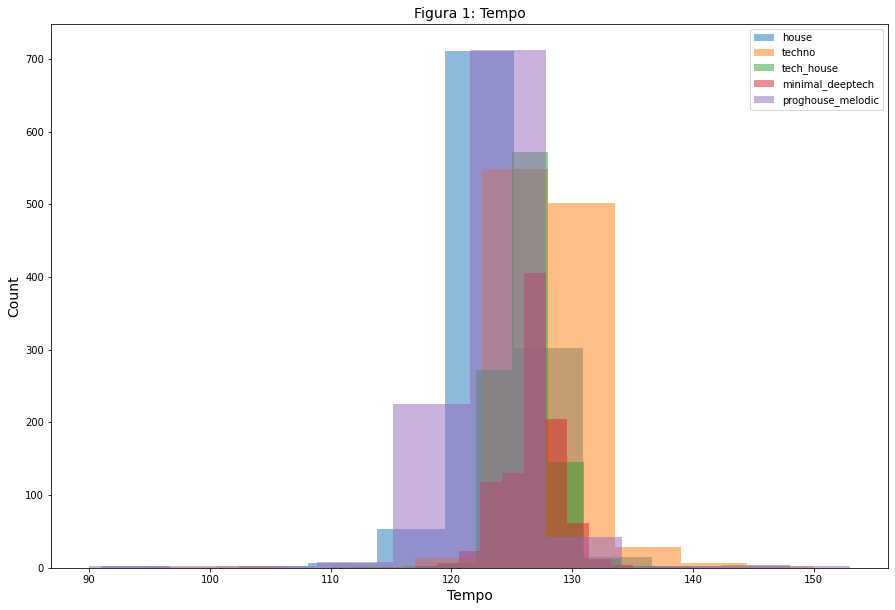

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[df['genre'] == 'house'].tempo, alpha=0.5, label='house');
plt.hist(df[df['genre'] == 'techno'].tempo, alpha=0.5, label='techno');
plt.hist(df[df['genre'] == 'tech_house'].tempo, alpha=0.5, label='tech_house');
plt.hist(df[df['genre'] == 'minimal_deeptech'].tempo, alpha=0.5, label='minimal_deeptech');
plt.hist(df[df['genre'] == 'proghouse_melodic'].tempo, alpha=0.5, label='proghouse_melodic');
plt.xlabel("Tempo", size=14);
plt.ylabel("Count", size=14);
plt.legend(loc='upper right');
plt.title("Figura 1: Tempo", size=14);

In [ ]:
df.groupby(['genre']).tempo.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
house,1100.0,124.095455,3.815225,91.0,123.0,124.0,126.0,148.0
minimal_deeptech,968.0,126.496901,2.129225,117.0,125.0,127.0,128.0,135.0
proghouse_melodic,1001.0,122.992008,3.778616,90.0,122.0,123.0,125.0,153.0
tech_house,1015.0,125.641379,2.072993,110.0,124.0,125.0,127.0,140.0
techno,1106.0,127.594937,3.207250,95.0,126.0,127.0,129.0,150.0


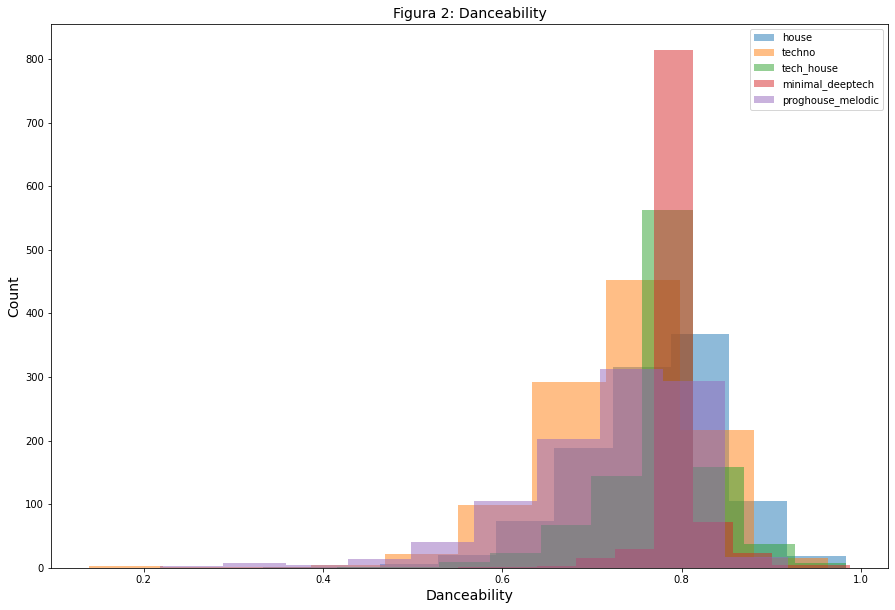

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[df['genre'] == 'house'].danceability, alpha=0.5, label='house');
plt.hist(df[df['genre'] == 'techno'].danceability, alpha=0.5, label='techno');
plt.hist(df[df['genre'] == 'tech_house'].danceability, alpha=0.5, label='tech_house');
plt.hist(df[df['genre'] == 'minimal_deeptech'].danceability, alpha=0.5, label='minimal_deeptech');
plt.hist(df[df['genre'] == 'proghouse_melodic'].danceability, alpha=0.5, label='proghouse_melodic');
plt.xlabel("Danceability", size=14);
plt.ylabel("Count", size=14);
plt.legend(loc='upper right');
plt.title("Figura 2: Danceability", size=14);

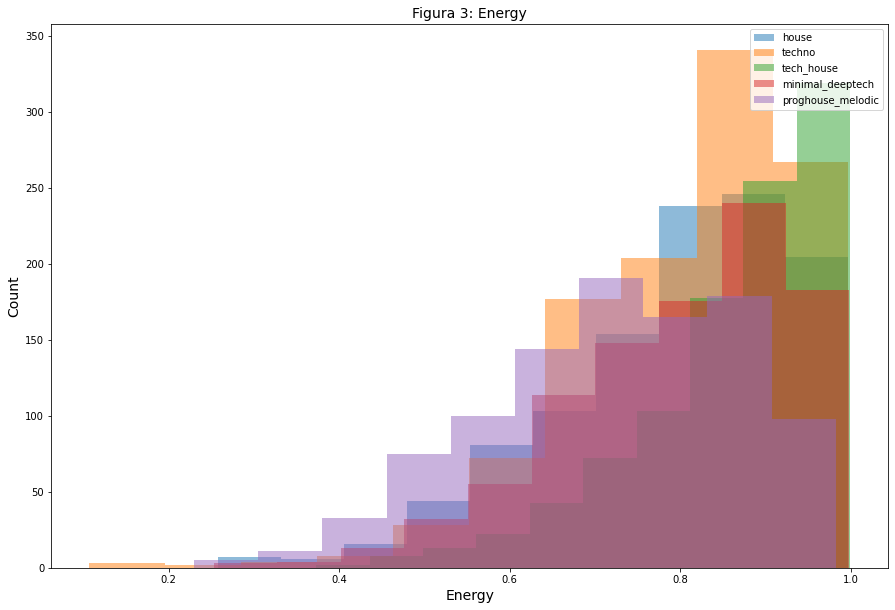

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[df['genre'] == 'house'].energy, alpha=0.5, label='house');
plt.hist(df[df['genre'] == 'techno'].energy, alpha=0.5, label='techno');
plt.hist(df[df['genre'] == 'tech_house'].energy, alpha=0.5, label='tech_house');
plt.hist(df[df['genre'] == 'minimal_deeptech'].energy, alpha=0.5, label='minimal_deeptech');
plt.hist(df[df['genre'] == 'proghouse_melodic'].energy, alpha=0.5, label='proghouse_melodic');
plt.xlabel("Energy", size=14);
plt.ylabel("Count", size=14);
plt.legend(loc='upper right');
plt.title("Figura 3: Energy", size=14);

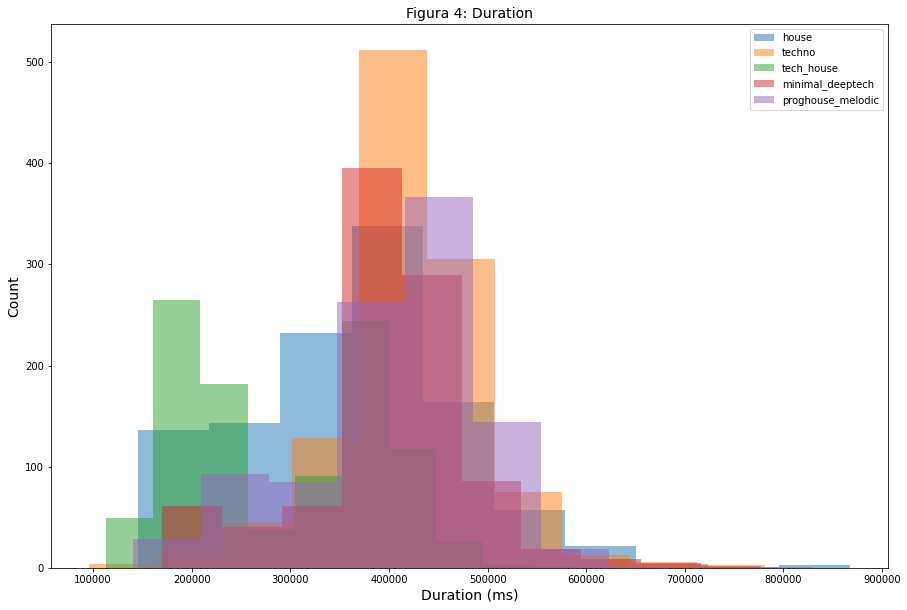

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[df['genre'] == 'house'].duration_ms, alpha=0.5, label='house');
plt.hist(df[df['genre'] == 'techno'].duration_ms, alpha=0.5, label='techno');
plt.hist(df[df['genre'] == 'tech_house'].duration_ms, alpha=0.5, label='tech_house');
plt.hist(df[df['genre'] == 'minimal_deeptech'].duration_ms, alpha=0.5, label='minimal_deeptech');
plt.hist(df[df['genre'] == 'proghouse_melodic'].duration_ms, alpha=0.5, label='proghouse_melodic');
plt.xlabel("Duration (ms)", size=14);
plt.ylabel("Count", size=14);
plt.legend(loc='upper right');
plt.title("Figura 4: Duration", size=14);

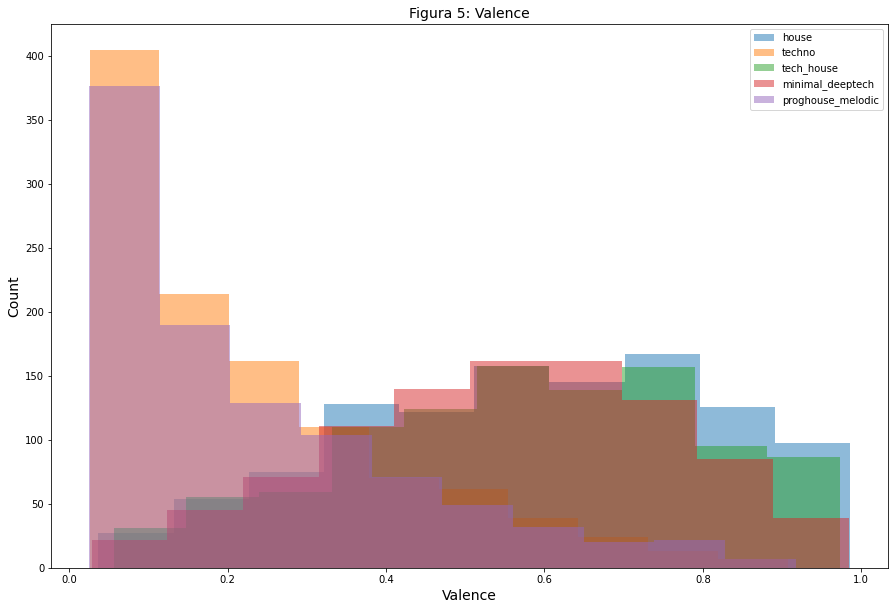

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(df[df['genre'] == 'house'].valence, alpha=0.5, label='house');
plt.hist(df[df['genre'] == 'techno'].valence, alpha=0.5, label='techno');
plt.hist(df[df['genre'] == 'tech_house'].valence, alpha=0.5, label='tech_house');
plt.hist(df[df['genre'] == 'minimal_deeptech'].valence, alpha=0.5, label='minimal_deeptech');
plt.hist(df[df['genre'] == 'proghouse_melodic'].valence, alpha=0.5, label='proghouse_melodic');
plt.xlabel("Valence", size=14);
plt.ylabel("Count", size=14);
plt.legend(loc='upper right');
plt.title("Figura 5: Valence", size=14);

In [ ]:
df_num = df.drop(['key', 'mode', 'time_signature'], axis=1)
corr = df_num.corr()

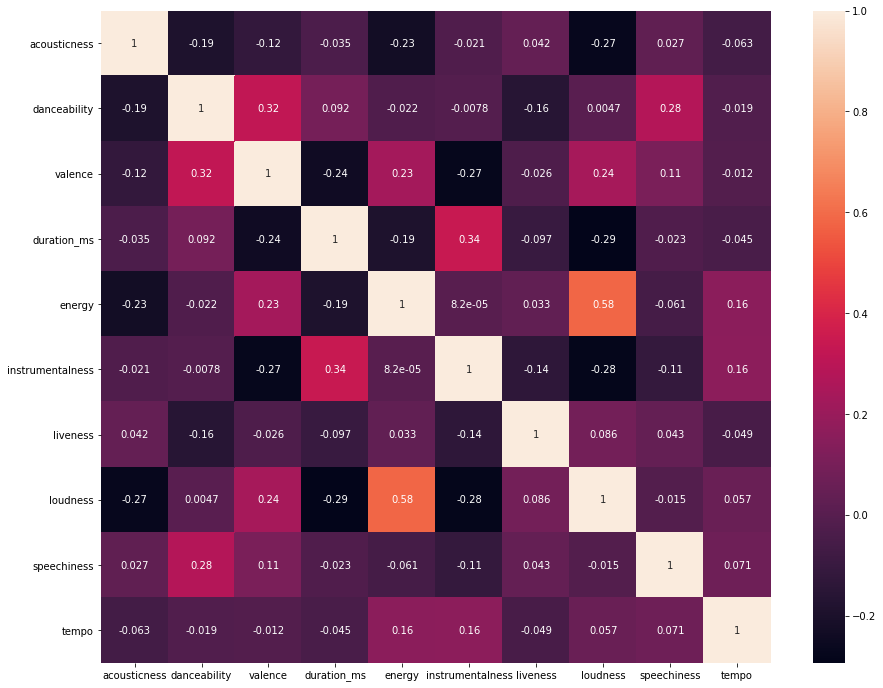

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True);

In [ ]:
X = df_num.drop(['id', 'name', 'artist', 'genre'], axis=1)
target = df_num['genre']

In [ ]:
log_loss_rfecv = make_scorer(score_func=log_loss, needs_proba=True, greater_is_better=False)
rfc = RandomForestClassifier(random_state=101, max_depth=5)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring=log_loss_rfecv)
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=5, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None,
      scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
      step=1,

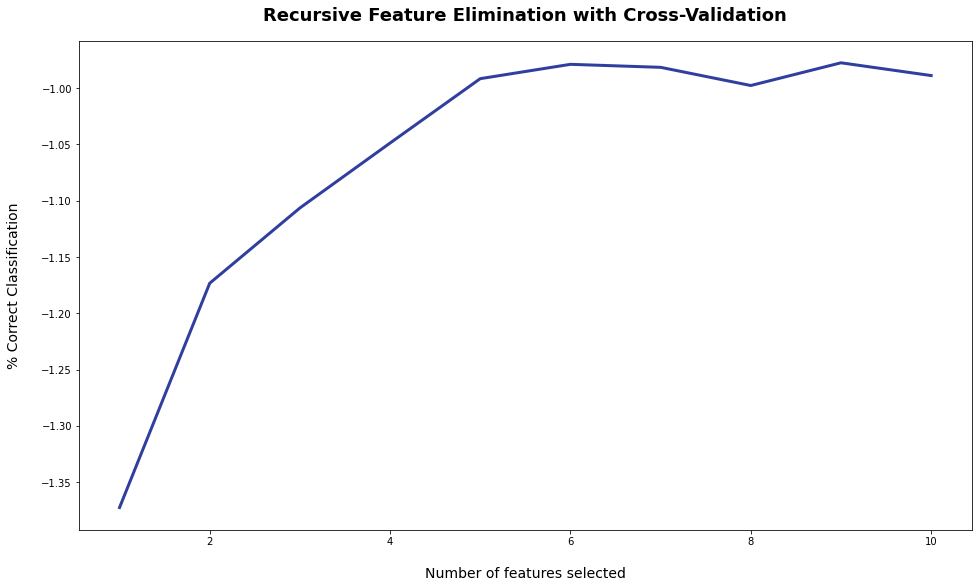

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

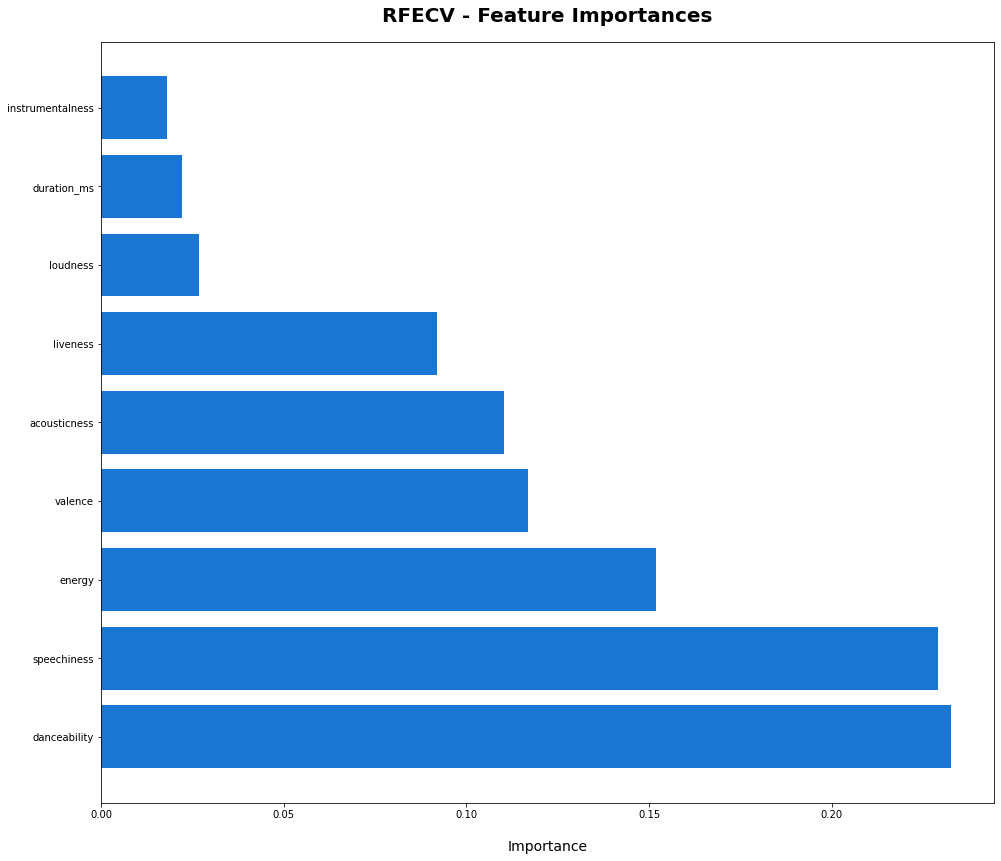

In [ ]:
rfecv_df = pd.DataFrame()
rfecv_df['attr'] = X.columns
rfecv_df['importance'] = pd.Series(rfecv.estimator_.feature_importances_)

rfecv_df = rfecv_df.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=rfecv_df['attr'], width=rfecv_df['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
rfecv2 = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv2.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=5, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

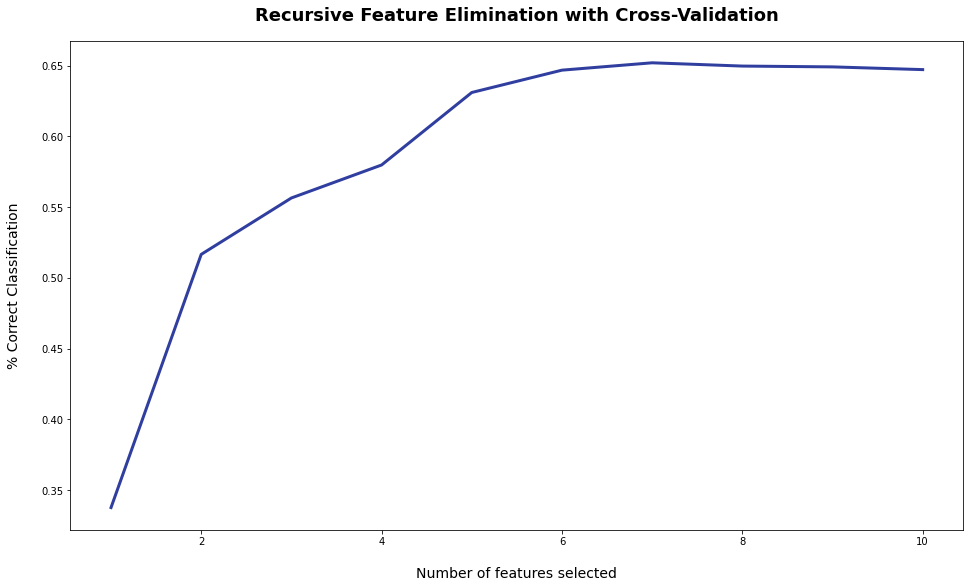

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

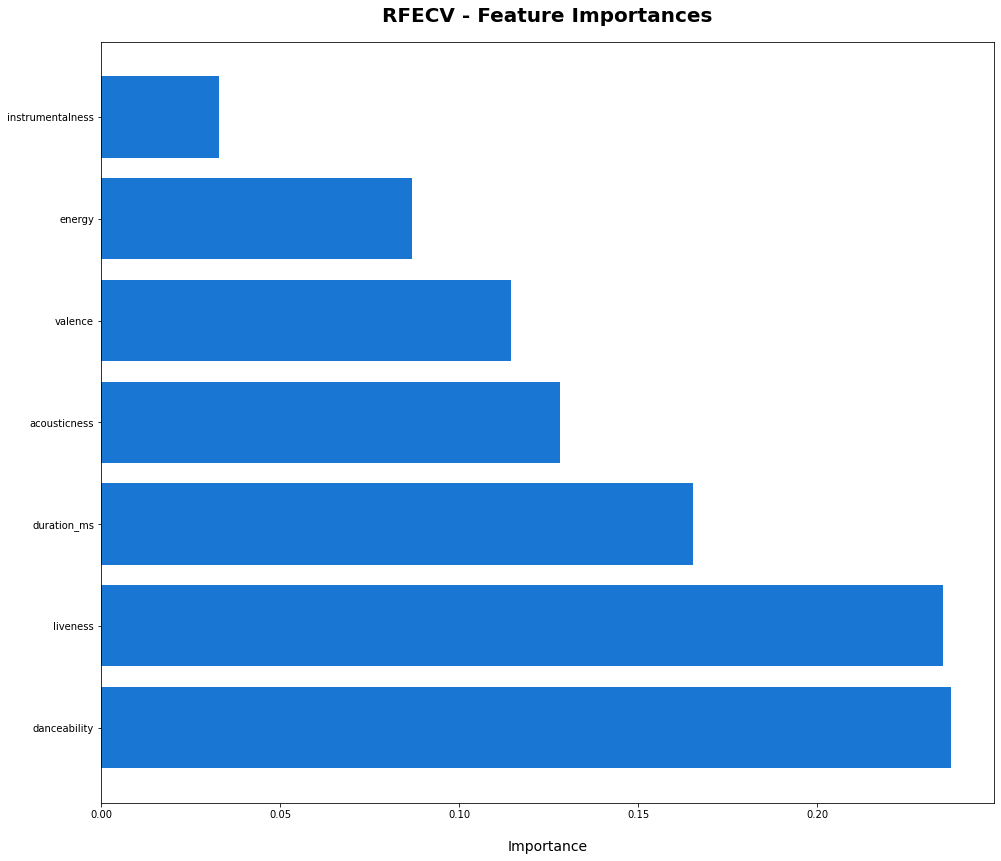

In [ ]:
rfecv2_df = pd.DataFrame()
rfecv2_df['attr'] = X.columns
rfecv2_df['importance'] = pd.Series(rfecv2.estimator_.feature_importances_)

rfecv2_df = rfecv2_df.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=rfecv2_df['attr'], width=rfecv2_df['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
df_final = df.drop(['time_signature', 'mode', 'key'], axis=1)
df_final.to_csv('final_dataset.csv')